<a href="https://colab.research.google.com/github/Branka-Kooij/BKooij-1/blob/main/Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
co2_emission = tables[1]

In [ ]:
co2_emission


Country[19]  ...   2018 CO2 emissions [20]
                        Country[19]  ... Total excluding LUCF [22]
0                             World  ...                  35247.21
1    World – International Aviation  ...                       NaN
2    World – International Shipping  ...                       NaN
3                       Afghanistan  ...                      7.44
4                           Albania  ...                      5.56
..                              ...  ...                       ...
207                         Vietnam  ...                    257.86
208                  Western Sahara  ...                       NaN
209                           Yemen  ...                      9.31
210                          Zambia  ...                      7.74
211                        Zimbabwe  ...                     12.27

[212 rows x 10 columns]

In [ ]:
co2_emission.columns =['country','1990', '2005', '2017', '2017_world_%', '2017vs1990_change_%', 'land_area', 'per_capi','tot_2018','total_exc2018']
co2_emission
co2_emission.loc[3:]

,country,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


In [ ]:
country_index = co2_emission.set_index('country')
country_only = country_index.drop([ "World", "World – International Aviation", "World – International Shipping", "European Union"], axis=0)
country_only



,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018
country,,,,,,,,,
Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31


In [ ]:
# Sort CO2 producers
sorted_global_co2 = country_only.sort_values(by=["2017"], ascending = False)
sorted_global_co2

,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018
country,,,,,,,,,
China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15
...,...,...,...,...,...,...,...,...,...
Falkland Islands,0.013,0.016,0.038,0.00%,192.3%,3.0,13.1,NaN,NaN
Kiribati,0.020,0.033,0.030,0.00%,50.0%,37.0,0.3,0.08,0.08
Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN


In [ ]:
#top 5 biggist CO2 producers
top5=sorted_global_co2.head(5)
top5


,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018
country,,,,,,,,,
China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15


In [ ]:
top5_new = top5.iloc[0:5, :3 ]                
top5_new


,1990,2005,2017
country,,,
China,2397.048,6263.064,10877.218
United States,5085.897,5971.571,5107.393
India,605.968,1210.754,2454.774
Russia,2378.921,1733.950,1764.866
Japan,1149.400,1276.863,1320.776


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

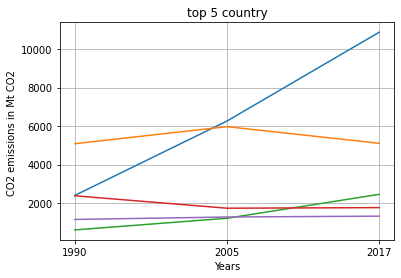

<Figure size 432x288 with 0 Axes>

In [ ]:
years = ["1990", "2005", "2017"] 


fig = plt.figure()
fig, ax = plt.subplots()

for index, row in top5_new.iterrows():
  plt.plot(years, row[0:], label = index)

ax.set_xlabel("Years")
ax.set_ylabel("CO2 emissions in Mt CO2 ")
ax.set_title('top 5 country')
ax.grid(True)
plt.figure()



In [ ]:
# Second graph

sorted_global_co2["1990_sart"]= 100
sorted_global_co2["change_2005"] = round((sorted_global_co2.loc[:,"2005"]/ sorted_global_co2.loc[:,"1990"]) *100 ,2)
sorted_global_co2["change_2017"] = round((sorted_global_co2.loc[:,"2017"]/ sorted_global_co2.loc[:,"1990"]) *100 , 2)
 

In [ ]:
sorted_global_co_12= sorted_global_co2.sort_values(by=["change_2017"], ascending = False)
sorted_global_co_12

,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018,1990_sart,change_2005,change_2017
country,,,,,,,,,,,,
Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,100,21033.33,17266.67
Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,100,659.95,2594.59
Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,100,3475.26,2545.36
Turks and Caicos Islands,0.007,0.005,0.165,0.00%,"2,257.1%",174.0,4.7,NaN,NaN,100,71.43,2357.14
Cape Verde,0.049,0.227,0.955,0.00%,"1,849.0%",237.0,1.7,0.56,0.62,100,463.27,1948.98
...,...,...,...,...,...,...,...,...,...,...,...,...
Georgia,34.745,4.979,11.558,0.03%,-66.7%,166.0,3.0,9.46,9.46,100,14.33,33.27
North Korea,131.365,79.568,37.774,0.10%,-71.2%,313.0,1.5,21.41,18.12,100,60.57,28.75
Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100,45.25,26.27


In [ ]:
#first 3 and last 3

new_sorted=sorted_global_co_12.iloc[np.r_[0:3, -3:0]]
new_sorted


,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018,1990_sart,change_2005,change_2017
country,,,,,,,,,,,,
Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,NaN,NaN,100,21033.33,17266.67
Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,40.16,11.16,100,659.95,2594.59
Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,10.51,6.67,100,3475.26,2545.36
Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100,45.25,26.27
Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,8.70,8.59,100,25.47,25.86
Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,100,21.94,23.34


In [ ]:
new_sorted_relative=new_sorted.iloc[0:, 9:]
new_sorted_relative

,1990_sart,change_2005,change_2017
country,,,
Greenland,100,21033.33,17266.67
Cambodia,100,659.95,2594.59
Equatorial Guinea,100,3475.26,2545.36
Ukraine,100,45.25,26.27
Moldova,100,25.47,25.86
Armenia,100,21.94,23.34


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

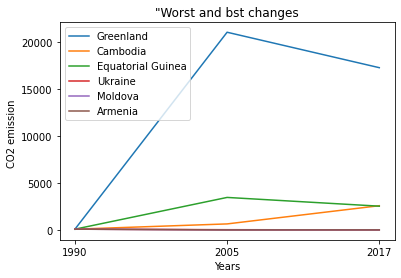

<Figure size 432x288 with 0 Axes>

In [ ]:
change = ["1990", "2005", "2017"] 


fig = plt.figure()
fig, ax = plt.subplots()

for index, row in new_sorted_relative.iterrows():
    plt.plot(change, row[0:], label = index)

ax.set_xlabel("Years")
ax.set_ylabel("CO2 emission ")
ax.set_title('"Worst and bst changes')

ax.legend(loc = "upper left")

plt.figure()


In [ ]:
#now create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.


global_5 = sorted_global_co2.loc[sorted_global_co2["1990"]>=5 ]
global_5

,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018,1990_sart,change_2005,change_2017
country,,,,,,,,,,,,
China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46,100,261.28,453.78
United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30,100,117.41,100.42
India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52,100,199.80,405.10
Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55,100,72.89,74.19
Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15,100,111.09,114.91
...,...,...,...,...,...,...,...,...,...,...,...,...
Jamaica,7.525,10.631,7.546,0.02%,0.3%,687.0,2.6,8.69,8.51,100,141.28,100.28
Curaçao,5.474,4.774,7.519,0.02%,37.4%,16935.0,46.8,NaN,NaN,100,87.21,137.36
Tajikistan,12.267,3.263,5.699,0.02%,-53.5%,40.0,0.6,7.20,7.33,100,26.60,46.46


In [ ]:
glob=global_5.sort_values(by=["change_2017"], ascending =False)
glob

,1990,2005,2017,2017_world_%,2017vs1990_change_%,land_area,per_capi,tot_2018,total_exc2018,1990_sart,change_2005,change_2017
country,,,,,,,,,,,,
Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,100,491.68,1083.78
Oman,11.884,32.964,78.421,0.21%,559.9%,253.0,16.9,73.39,73.37,100,277.38,659.89
Bangladesh,13.868,38.834,84.546,0.23%,509.6%,573.0,0.5,104.50,82.76,100,280.03,609.65
Qatar,16.291,43.435,97.787,0.26%,500.3%,8440.0,37.1,90.17,90.17,100,266.62,600.25
Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,100,273.03,527.70
...,...,...,...,...,...,...,...,...,...,...,...,...
Georgia,34.745,4.979,11.558,0.03%,-66.7%,166.0,3.0,9.46,9.46,100,14.33,33.27
North Korea,131.365,79.568,37.774,0.10%,-71.2%,313.0,1.5,21.41,18.12,100,60.57,28.75
Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,173.18,185.37,100,45.25,26.27


In [ ]:
new_sorted_global=glob.iloc[0:, 9:]
new_sorted_global

,1990_sart,change_2005,change_2017
country,,,
Vietnam,100,491.68,1083.78
Oman,100,277.38,659.89
Bangladesh,100,280.03,609.65
Qatar,100,266.62,600.25
Angola,100,273.03,527.70
...,...,...,...
Georgia,100,14.33,33.27
North Korea,100,60.57,28.75
Ukraine,100,45.25,26.27


In [ ]:
new_sorted_global2=new_sorted_global.iloc[np.r_[0:3, -3:0]]
new_sorted_global2


,1990_sart,change_2005,change_2017
country,,,
Vietnam,100,491.68,1083.78
Oman,100,277.38,659.89
Bangladesh,100,280.03,609.65
Ukraine,100,45.25,26.27
Moldova,100,25.47,25.86
Armenia,100,21.94,23.34


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

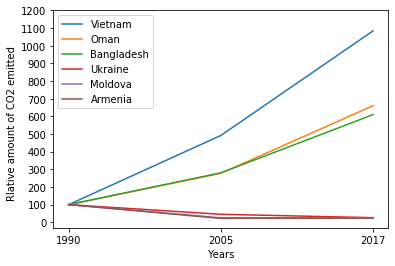

<Figure size 432x288 with 0 Axes>

In [ ]:
change = ["1990", "2005", "2017"] 

fig = plt.figure()
fig, ax = plt.subplots()

for index, row in new_sorted_global2.iterrows():
  plt.plot(change, row[0:], label = index)

ax.set_xlabel(" Years ")
ax.set_ylabel("Rlative amount of CO2 emitted  ")
plt.yticks(np.arange(0, 1300, 100))

ax.legend(loc = "upper left")

plt.figure()